In [ ]:
import pandas as pd
import numpy as np


### Training and testing data is available <a href = "https://www.kaggle.com/c/santander-customer-transaction-prediction/data">here.</a>

In [ ]:
data=pd.read_csv('train_santander.csv')
test=pd.read_csv('test.csv')

### Due to large data size, we reduce its size for faster implmentation of ML models.

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


In [ ]:
data = reduce_mem_usage(data)
test = reduce_mem_usage(test)

Memory usage of dataframe is 308.23 MB
Memory usage after optimization is: 78.01 MB
Decreased by 74.7%
Memory usage of dataframe is 306.70 MB
Memory usage after optimization is: 77.82 MB
Decreased by 74.6%


In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.625000,-4.921875,5.746094,2.925781,3.181641,14.015625,0.574707,8.796875,14.570312,5.750000,-7.238281,4.285156,30.718750,10.531250,16.218750,2.578125,2.470703,14.382812,13.429688,-5.148438,-0.407227,4.929688,5.996094,-0.308594,12.906250,-3.876953,16.890625,11.195312,10.578125,0.676270,7.886719,...,15.460938,5.312500,3.615234,5.039062,6.675781,12.664062,2.701172,-0.697266,9.601562,5.488281,-4.765625,-8.421875,20.875000,3.152344,18.562500,7.742188,-10.125000,13.726562,-3.519531,1.719727,-8.406250,9.015625,3.066406,14.367188,25.843750,5.875000,11.843750,-19.718750,17.578125,0.585938,4.433594,3.964844,3.136719,1.691406,18.515625,-2.398438,7.878906,8.562500,12.781250,-1.091797
1,train_1,0,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.531250,3.146484,8.085938,-0.403320,8.054688,14.023438,8.414062,5.433594,13.703125,13.828125,-15.585938,7.800781,28.578125,3.427734,2.740234,8.554688,3.371094,6.976562,13.890625,-11.765625,-2.558594,5.046875,0.548340,-9.296875,7.875000,1.286133,19.375000,11.367188,0.739746,2.798828,5.843750,...,29.484375,5.867188,3.820312,15.835938,-5.011719,15.132812,3.201172,9.320312,3.882812,5.800781,5.539062,5.097656,22.031250,5.511719,30.265625,10.500000,-7.234375,16.578125,-7.347656,11.078125,-5.593750,9.484375,-14.906250,9.421875,22.546875,-4.863281,7.656250,-15.929688,13.320312,-0.356689,7.640625,7.722656,2.583984,10.953125,15.429688,2.033203,8.125000,8.789062,18.359375,1.952148
2,train_2,0,8.609375,-2.746094,12.078125,7.894531,10.585938,-9.085938,6.941406,14.617188,-4.917969,5.953125,-0.324951,-11.265625,14.195312,7.312500,7.523438,14.648438,7.679688,-1.739258,4.699219,20.484375,17.750000,18.140625,1.214844,3.513672,5.675781,13.218750,-7.992188,-2.902344,5.847656,6.144531,-11.101562,12.484375,-2.287109,19.046875,11.046875,4.109375,4.699219,6.933594,...,13.203125,5.843750,4.707031,5.714844,-1.041016,20.515625,3.279297,-5.593750,7.316406,5.769531,-7.093750,-3.912109,7.257812,-5.824219,25.687500,10.921875,-0.310303,8.843750,-9.703125,2.400391,-4.292969,9.390625,-13.265625,3.154297,23.093750,-5.300781,5.375000,-6.265625,10.195312,-0.841797,2.906250,9.789062,1.669922,1.685547,21.609375,3.142578,-6.519531,8.265625,14.718750,0.396484
3,train_3,0,11.062500,-2.152344,8.953125,7.195312,12.585938,-1.835938,5.843750,14.921875,-5.859375,8.242188,2.306641,2.810547,13.843750,11.968750,6.457031,14.835938,10.742188,-0.429932,15.945312,13.726562,20.296875,12.554688,6.820312,2.722656,12.132812,13.734375,0.813477,-0.905762,5.906250,2.839844,-15.242188,10.437500,-2.572266,6.179688,10.609375,-5.914062,8.171875,2.851562,...,31.890625,5.968750,7.207031,3.890625,-11.085938,17.250000,2.587891,-2.701172,0.563965,5.343750,-7.152344,-6.191406,18.234375,11.710938,14.750000,8.101562,11.875000,13.953125,-10.468750,5.695312,-3.753906,8.414062,1.898438,7.261719,-0.463867,-0.049805,7.933594,-12.828125,12.414062,1.848633,4.464844,4.742188,0.717773,1.421875,23.031250,-1.270508,-2.927734,10.289062,17.968750,-9.000000
4,train_4,0,9.835938,-1.483398,12.875000,6.636719,12.273438,2.449219,5.941406,19.250000,6.265625,7.679688,-9.445312,-12.140625,13.851562,7.890625,7.789062,15.054688,8.484375,-3.068359,6.527344,11.312500,21.421875,18.953125,10.109375,2.714844,14.210938,13.546875,3.173828,-3.341797,5.902344,7.933594,-3.158203,9.468750,-0.008301,19.328125,12.406250,0.

In [ ]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.062500,7.781250,12.953125,9.429688,11.429688,-2.380859,5.847656,18.265625,2.132812,8.812500,-2.025391,-4.355469,13.968750,0.345703,7.539062,14.500000,7.703125,-19.093750,15.578125,16.171875,3.708984,18.812500,1.589844,3.064453,6.449219,14.117188,-9.492188,-2.191406,5.710938,3.787109,-1.797852,9.265625,2.066406,12.773438,11.335938,8.148438,-0.061005,3.533203,9.781250,...,5.921875,5.410156,3.830078,5.738281,-8.609375,22.953125,2.552734,-0.283691,4.339844,5.183594,4.261719,1.677734,29.078125,8.468750,18.125000,12.281250,-0.691406,10.218750,-5.558594,2.292969,-4.535156,10.390625,-15.492188,3.968750,31.359375,-1.165039,9.289062,-23.578125,13.265625,1.659180,-2.156250,11.851562,-1.429688,2.451172,13.710938,2.466797,4.367188,10.718750,15.468750,-8.718750
1,test_1,8.531250,1.253906,11.304688,5.187500,9.195312,-4.011719,6.019531,18.625000,-4.414062,5.972656,-1.380859,-0.331055,14.109375,2.566406,5.500000,14.187500,7.019531,4.656250,29.156250,0.091003,12.148438,3.138672,5.257812,2.421875,16.203125,13.500000,-5.234375,-3.664062,5.707031,2.996094,-10.468750,11.492188,-0.965820,15.343750,10.632812,0.896484,6.742188,2.341797,12.867188,...,30.968750,5.671875,3.687500,13.039062,-10.656250,15.515625,3.218750,9.054688,7.054688,5.390625,-0.771973,-8.179688,29.921875,-5.628906,10.500000,9.609375,-0.493408,8.171875,-4.359375,5.210938,0.408691,12.000000,-10.382812,5.847656,25.203125,-8.843750,11.828125,-8.710938,15.906250,0.980957,10.617188,8.835938,0.940430,10.125000,15.578125,0.477295,-1.485352,9.875000,19.125000,-20.968750
2,test_2,5.484375,-10.359375,10.140625,7.046875,10.265625,9.804688,4.894531,20.250000,1.523438,8.343750,-4.707031,-3.042969,13.671875,3.818359,10.851562,14.210938,9.882812,2.654297,21.218750,20.812500,12.468750,12.367188,4.746094,2.792969,5.218750,13.570312,-15.421875,-0.165527,7.261719,3.431641,-9.148438,9.734375,3.105469,22.312500,11.960938,9.921875,4.070312,4.992188,8.070312,...,39.375000,5.523438,3.316406,4.332031,-0.538086,13.304688,3.125000,-4.171875,1.233398,6.152344,-0.039093,1.495117,16.890625,-2.978516,27.406250,15.882812,-10.968750,15.640625,-9.406250,4.460938,-3.083984,8.554688,-2.851562,13.476562,24.468750,-3.482422,4.917969,-2.072266,11.539062,1.181641,-0.748535,10.992188,1.980469,2.179688,12.984375,2.128906,-7.109375,7.062500,19.890625,-23.171875
3,test_3,8.539062,-1.322266,12.023438,6.574219,8.843750,3.173828,4.941406,20.562500,3.375000,7.457031,0.009499,-5.066406,14.054688,13.500000,8.765625,14.734375,10.039062,-15.351562,2.126953,21.484375,14.539062,12.554688,2.970703,4.238281,13.781250,14.140625,1.005859,-1.347656,5.257812,6.589844,6.214844,9.554688,2.363281,10.210938,10.804688,-2.558594,6.070312,3.261719,16.562500,...,19.718750,5.386719,3.677734,7.476562,-11.078125,24.875000,2.640625,2.267578,7.277344,5.640625,7.203125,3.451172,2.412109,11.164062,14.546875,10.617188,-5.792969,13.937500,7.109375,1.101562,9.460938,9.828125,5.992188,5.164062,8.117188,3.664062,3.310547,-19.781250,13.453125,1.310547,9.570312,9.078125,1.658203,3.582031,15.187500,3.166016,3.957031,9.226562,13.015625,-4.210938
4,test_4,11.703125,-0.132690,14.132812,7.750000,9.101562,-8.585938,6.859375,10.601562,2.988281,7.144531,5.101562,-3.283203,14.101562,8.968750,4.726562,14.578125,11.859375,3.148438,18.015625,13.796875,1.602539,16.312500,6.796875,3.601562,13.656250,13.882812,8.625000,-2.265625,5.226562,7.015625,-15.695312,10.625000,-4.765625,17.546

In [ ]:
train_df=data
test_df=test

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


### Distribution of mean and variance

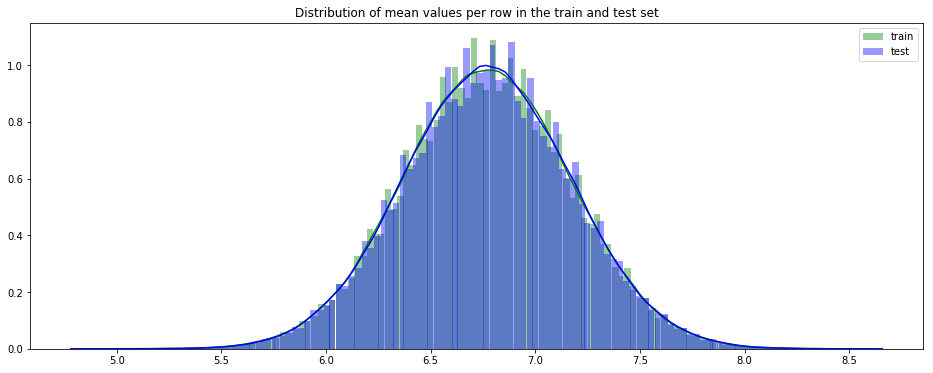

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

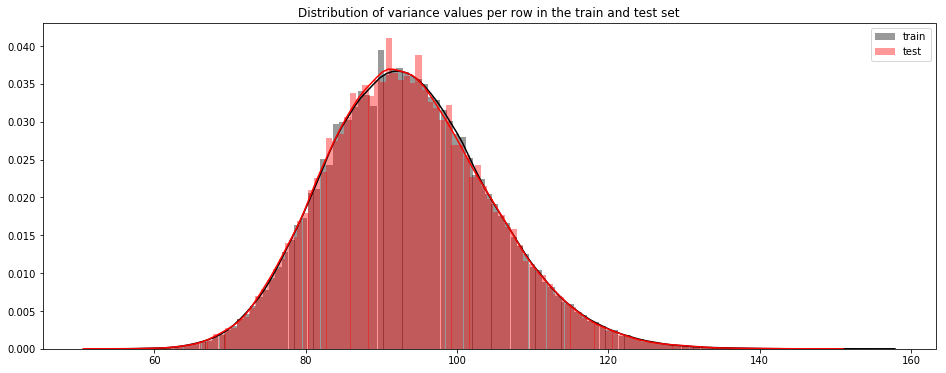

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of variance values per row in the train and test set")
sns.distplot(train_df[features].var(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].var(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

### Distribution of skewness

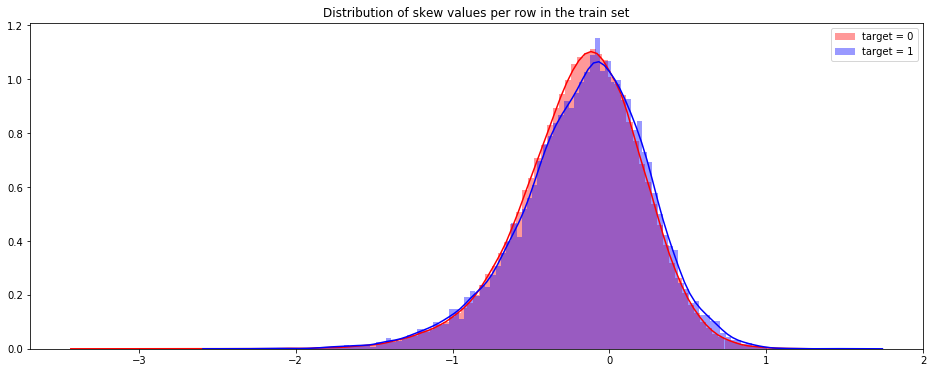

In [ ]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per row in the train set")
sns.distplot(t0[features].skew(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

### Distribution of min and max#


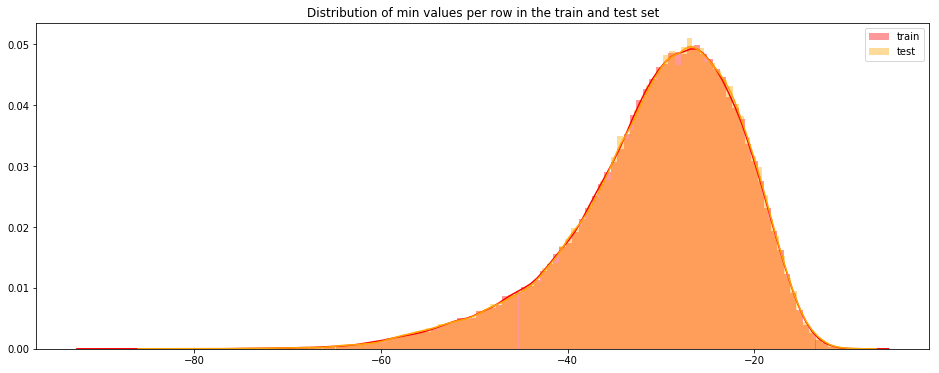

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

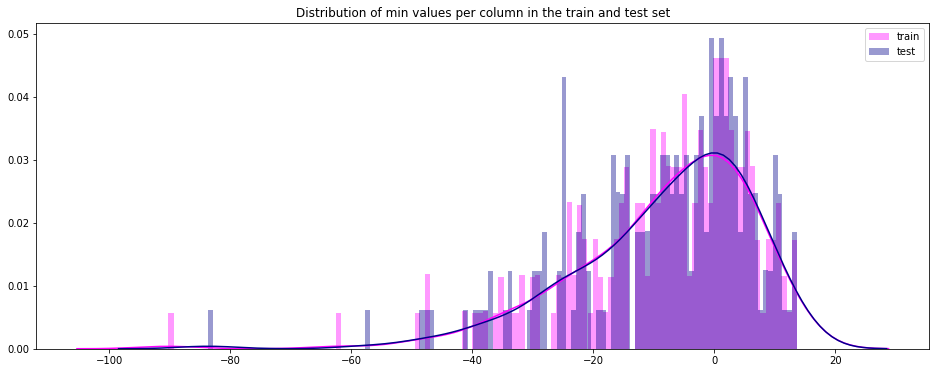

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train_df[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

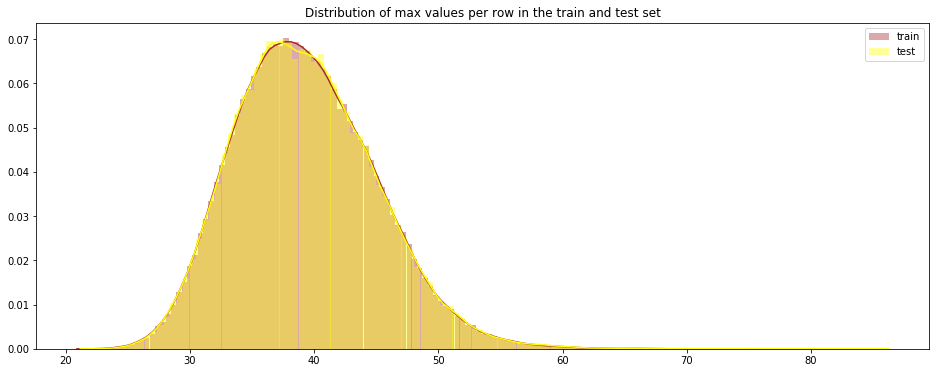

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

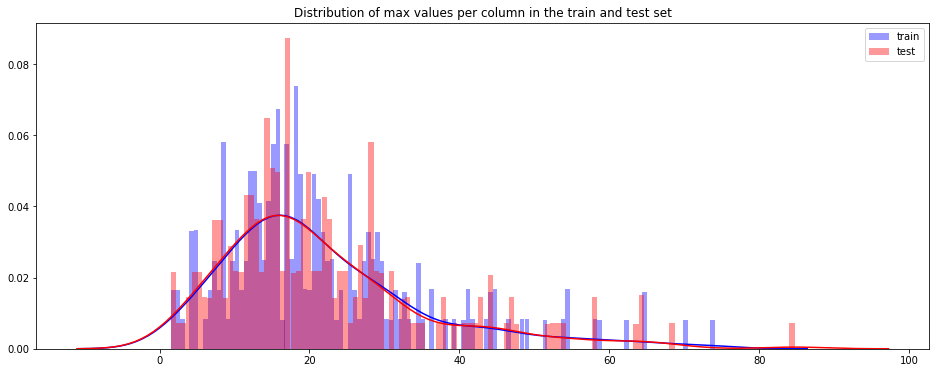

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train_df[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()


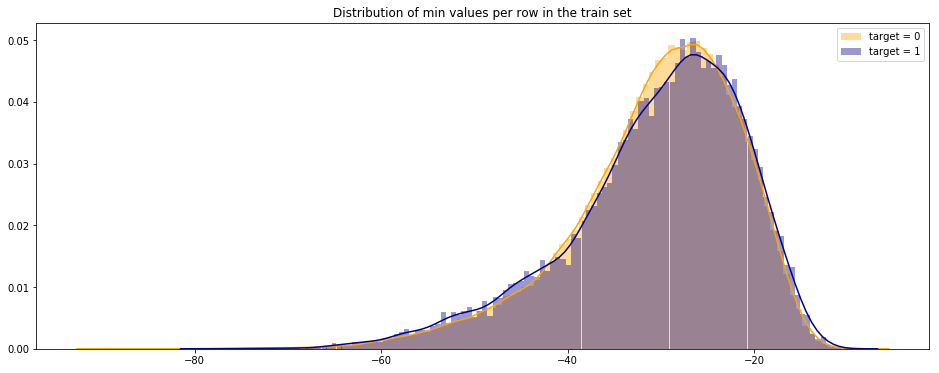

In [ ]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

### We observe that there is a class imbalance in the data

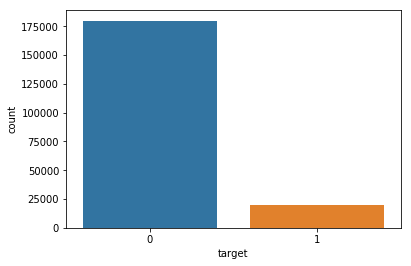

In [ ]:
sns.countplot(data['target'])

In [ ]:
idx = features = train_df.columns.values[2:202]
for df in [test_df, train_df]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
   

In [ ]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,3,figsize=(18,8))

    for feature in features:
        i += 1
        if(i<7):
          plt.subplot(2,3,i)
          sns.kdeplot(df1[feature], bw=0.5,label=label1)
          sns.kdeplot(df2[feature], bw=0.5,label=label2)
          plt.xlabel(feature, fontsize=11)
          locs, labels = plt.xticks()
          plt.tick_params(axis='x', which='major', labelsize=8)
          plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

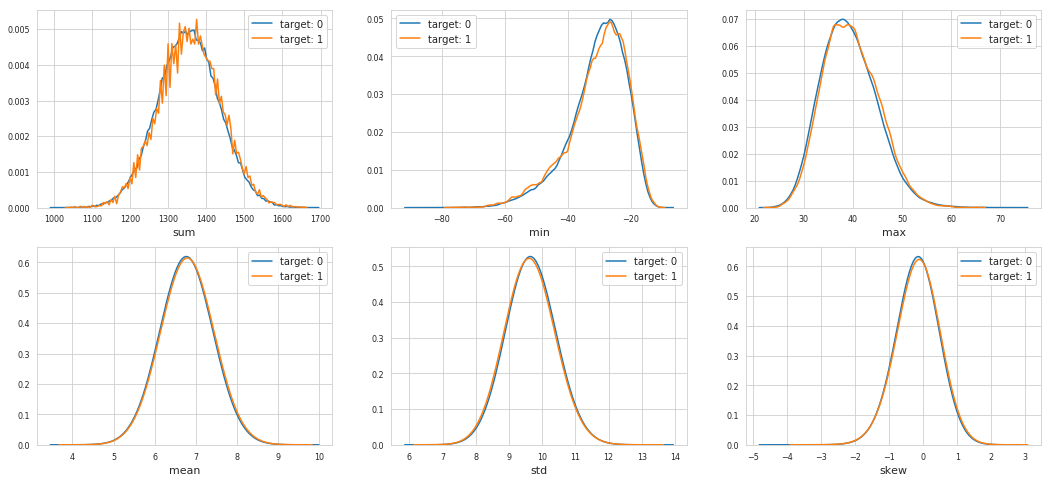

In [ ]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

### Before Feature Engineering Correlation matrix

In [ ]:
correlations = train_df[features].corr().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,var_139,var_26,-0.009844
1,var_26,var_139,-0.009844
2,var_148,var_53,-0.009784
3,var_53,var_148,-0.009784
4,var_80,var_6,-0.008959
5,var_6,var_80,-0.008959
6,var_80,var_1,-0.008856
7,var_1,var_80,-0.008856
8,var_13,var_2,-0.008795
9,var_2,var_13,-0.008795


In [ ]:
correlations.tail(10)

,level_0,level_1,0
39790,var_132,var_122,0.008954
39791,var_122,var_132,0.008954
39792,var_169,var_146,0.009078
39793,var_146,var_169,0.009078
39794,var_189,var_183,0.009359
39795,var_183,var_189,0.009359
39796,var_174,var_81,0.009494
39797,var_81,var_174,0.009494
39798,var_81,var_165,0.009717
39799,var_165,var_81,0.009717


### After Feature Enginerring Correlation Matrix

In [ ]:
correlations = train_df[features].corr().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,min,std,-0.546556
1,std,min,-0.546556
2,std,skew,-0.228264
3,skew,std,-0.228264
4,sum,std,-0.084748
5,std,sum,-0.084748
6,mean,std,-0.084736
7,std,mean,-0.084736
8,max,min,0.002561
9,min,max,0.002561


In [ ]:
correlations.tail(10)

,level_0,level_1,0
20,skew,mean,0.459580
21,mean,skew,0.459580
22,skew,sum,0.459767
23,sum,skew,0.459767
24,max,skew,0.465609
25,skew,max,0.465609
26,min,skew,0.760773
27,skew,min,0.760773
28,mean,sum,0.999520
29,sum,mean,0.999520


### Reloading the dataset

In [ ]:
data=pd.read_csv('../content/gdrive/My Drive/Colab Notebooks/train_santander.csv')
data = reduce_mem_usage(data)



Memory usage of dataframe is 308.23 MB
Memory usage after optimization is: 78.01 MB
Decreased by 74.7%


In [ ]:
data[data.columns.values[2:202]]=data[data.columns.values[2:202]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,7496.0,0.001130,inf,163.000,inf,0.000093,166.875,inf,0.007286,313.0,18.656250,24.093750,inf,1.776367,6612.0,inf,314.25,7.185936e-04,72.625,inf,37472.0000,inf,13.171875,11.828125,inf,inf,0.005810,0.665527,138.375,401.750000,7.343750e-01,inf,0.020721,inf,inf,39264.000000,1.966797,2662.0000,...,inf,202.875,37.15625,154.3750,793.000000,inf,14.898438,0.498047,14784.000000,241.875,0.008514,0.000220,inf,23.390625,inf,2304.0,0.000040,inf,0.029617,5.582031,0.000224,8232.0,2.146875e+01,inf,inf,356.000000,inf,0.000000e+00,inf,1.796875,84.250000,52.71875,23.031250,5.425781,inf,0.090881,2640.000000,5232.0,inf,0.335693
1,train_1,0,inf,0.015793,inf,219.375,inf,1145.000000,276.250,inf,23.250000,3248.0,0.667969,3148.000000,inf,4512.000000,229.0,inf,inf,1.788139e-07,2442.000,inf,30.8125,15.492188,5192.000000,29.109375,1071.00,inf,0.000008,0.077393,155.500,1.730469,9.173155e-05,2630.0,3.619141,inf,inf,2.095703,16.421875,345.0000,...,inf,353.250,45.62500,inf,0.006660,inf,24.562500,11160.000000,48.562500,330.500,254.500000,163.625000,inf,247.625000,inf,36320.0,0.000721,inf,0.000644,64736.000000,0.003721,13152.0,3.576279e-07,12352.0000,inf,0.007725,2114.0,1.192093e-07,inf,0.700195,2082.000000,2258.00000,13.250000,57120.000000,inf,7.636719,3378.000000,6564.0,inf,7.042969
2,train_2,0,5484.0,0.064148,inf,2682.000,39584.0,0.000113,1034.000,inf,0.007313,385.0,0.722656,0.000013,inf,1499.000000,1851.0,inf,2164.00,1.756592e-01,109.875,inf,inf,inf,3.369141,33.562500,291.75,inf,0.000338,0.054901,346.500,466.250000,1.507998e-05,inf,0.101562,inf,62752.0,60.906250,109.875000,1026.0000,...,inf,345.000,110.75000,303.2500,0.353027,inf,26.562500,0.003721,1505.000000,320.500,0.000830,0.020004,1419.0,0.002954,inf,55360.0,0.733398,6932.0,0.000061,11.031250,0.013664,11976.0,1.728535e-06,23.4375,inf,0.004986,216.0,1.900673e-03,26784.0,0.430908,18.281250,17840.00000,5.312500,5.394531,inf,23.156250,0.001474,3888.0,inf,1.486328
3,train_3,0,63744.0,0.116211,7732.0,1333.000,inf,0.159424,345.000,inf,0.002853,3798.0,10.039062,16.625000,inf,inf,637.0,inf,46272.00,6.503906e-01,inf,inf,inf,inf,916.500000,15.218750,inf,inf,2.255859,0.404297,367.250,17.109375,2.384186e-07,34112.0,0.076355,482.75,40512.0,0.002701,3540.000000,17.3125,...,inf,391.000,1349.00000,48.9375,0.000015,inf,13.304688,0.067139,1.757812,209.250,0.000783,0.002047,inf,inf,inf,3300.0,inf,inf,0.000028,297.500000,0.023422,4512.0,6.675781e+00,1425.0000,0.628906,0.951172,2790.0,2.682209e-06,inf,6.351562,86.937500,114.68750,2.050781,4.144531,inf,0.280762,0.053528,29408.0,inf,0.000123
4,train_4,0,18688.0,0.226807,inf,762.500,inf,11.578125,380.500,inf,526.000000,2164.0,0.000079,0.000005,inf,2672.000000,2414.0,inf,4840.00,4.650879e-02,683.500,inf,inf,inf,24576.000000,15.101562,inf,inf,23.906250,0.035370,366.000,2790.000000,4.251099e-02,12952.0,0.991699,inf,inf,1.882812,16.328125,337.0000,...,inf,297.500,236.25000,inf,719.000000,inf,25.296875,0.169312,22.843750,257.500,4.261719,0.069824,inf,10.710938,inf,inf,0.035248,inf,5.578125,176.875000,0.000455,17424.0,1.330000e+02,inf,inf,0.000373,615.0,3.745000e+02,inf,0.753418,0.225342,13680.00000,0.859863,9848.000000,inf,0.220581,50.687500,13360.0,inf,0.000149


In [ ]:
correlations = data[data.columns.values[2:202]].corr().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,var_53,var_148,-0.010207
1,var_148,var_53,-0.010207
2,var_81,var_119,-0.009697
3,var_119,var_81,-0.009697
4,var_190,var_107,-0.009696
5,var_107,var_190,-0.009696
6,var_30,var_69,-0.009356
7,var_69,var_30,-0.009356
8,var_179,var_177,-0.008875
9,var_177,var_179,-0.008875


In [ ]:
correlations.tail(10)

,level_0,level_1,0
39790,var_81,var_165,0.008403
39791,var_165,var_81,0.008403
39792,var_146,var_169,0.008449
39793,var_169,var_146,0.008449
39794,var_110,var_191,0.008922
39795,var_191,var_110,0.008922
39796,var_52,var_14,0.009018
39797,var_14,var_52,0.009018
39798,var_78,var_35,0.009890
39799,var_35,var_78,0.009890


### SMOTE And Recursive Feature Elimination

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

y=data['target']
x=data.copy()
x=x.drop(['target','ID_code'],axis=1)
sm = SMOTE(sampling_strategy='all', random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
data = data.columns.values.tolist()
y = ['y']
X = [i for i in data if i not in y]

In [ ]:
os_data_X,os_data_y = sm.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### RANDOM FOREST along with SMOTE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
y=data['target']
x=data.copy()
x=x.drop(['target','ID_code'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
m = RandomForestRegressor(n_estimators=30, max_features=0.5, min_samples_leaf=5,n_jobs=-1,verbose=2, oob_score=True)
m.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.3min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=2, warm_start=False)

In [ ]:
y_pred = m.predict(X_test)
print(m.score(X_train, y_train), m.score(X_test, y_test), m.oob_score_)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.8797042318065029 -0.40821917685499565 0.61485903105747


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished


In [ ]:
y_pred=list(y_pred)

In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]>=0.25):
    y_pred[i]=1
  else:
    y_pred[i]=0  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.95      0.40      0.57     35903
           1       0.14      0.82      0.23      4097

    accuracy                           0.45     40000
   macro avg       0.54      0.61      0.40     40000
weighted avg       0.87      0.45      0.53     40000



In [ ]:
from sklearn.metrics import roc_auc_score
print("Roc_auc",roc_auc_score(y_test,m.predict(X_test)))
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print("Average_precision",average_precision)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Roc_auc 0.670334268103713
Average_precision 0.13010204965069852


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14515, 21388],
       [  728,  3369]])

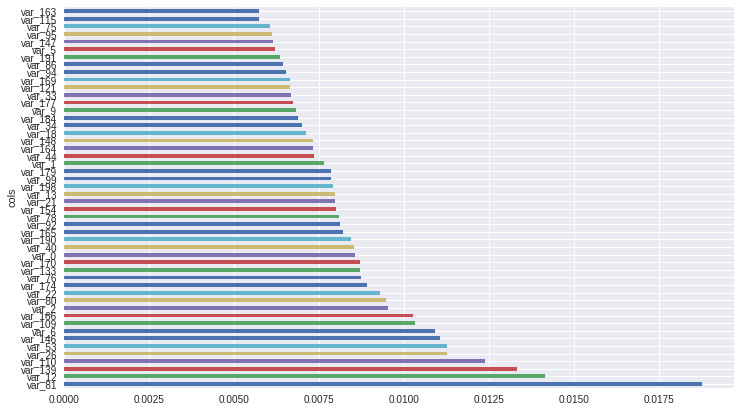

In [ ]:
fi = rf_feat_importance(m, x)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:50]);


### Fitting random forest on top 100 important features

In [ ]:
to_keep = fi[:100].cols
df_new=x[to_keep].copy()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.4, random_state=42)

In [ ]:
m1 = RandomForestRegressor(n_estimators=10, max_features=0.5, min_samples_leaf=5,n_jobs=-1,verbose=2, oob_score=True)
m1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=None, verbose=2, warm_start=False)

In [ ]:
preds = m1.predict(X_test)
print(m1.score(X_train, y_train), m1.score(X_test, y_test), m1.oob_score_)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.6175116004036567 0.10161392073080999 -0.04566418039408204


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished


### LOGISTIC REGRESSION

In [ ]:
arr=[]
for i in range(len(x)):
  l=[]
  for j in x.columns:  
    l.append(x[j].iloc[i])
  arr.append(l)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(arr, y, test_size=0.4, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
...                          multi_class='ovr').fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
roc_auc_score(y_test, clf.predict(X_test))

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.61241636038064

In [ ]:
clf.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.9124416666666667

In [ ]:
clf.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.910825

### NEURAL NETWORK


In [ ]:
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(16 ,kernel_initializer = 'uniform', activation='relu', input_shape=(200,)))
model.add(layers.Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,kernel_initializer = 'uniform'  ,activation='relu'))

model.add(layers.Dense(1,kernel_initializer = 'uniform',activation='sigmoid'))          

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=50,batch_size=256,validation_data=(X_test,y_test))

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 3s 18us/step - loss: 0.2936 - acc: 0.9004 - val_loss: 0.2633 - val_acc: 0.9058
Epoch 2/50
160000/160000 [==============================] - 2s 13us/step - loss: 0.2644 - acc: 0.9062 - val_loss: 0.2603 - val_acc: 0.9074
Epoch 3/50
160000/160000 [==============================] - 2s 13us/step - loss: 0.2589 - acc: 0.9075 - val_loss: 0.2614 - val_acc: 0.9047
Epoch 4/50
160000/160000 [==============================] - 2s 13us/step - loss: 0.2569 - acc: 0.9079 - val_loss: 0.2523 - val_acc: 0.9089
Epoch 5/50
160000/160000 [==============================] - 2s 13us/step - loss: 0.2544 - acc: 0.9084 - val_loss: 0.2515 - val_acc: 0.9085
Epoch 6/50
160000/160000 [==============================] - 2s 13us/step - loss: 0.2519 - acc: 0.9093 - val_loss: 0.2648 - val_acc: 0.9029
Epoch 7/50
160000/160000 [==============================] - 2s 13us/step - loss: 0.2508 - acc: 0.9090 - val_loss: 0

In [ ]:
z=model.predict(X_test)
z=z>0.5
z=z.astype(int)

In [ ]:
roc_auc_score(y_test, z)

0.6003851596419341

### XG BOOST USING UPSAMPLED DATA

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('train_santander.csv')

In [ ]:
data = reduce_mem_usage(data)


Memory usage of dataframe is 308.23 MB
Memory usage after optimization is: 78.01 MB
Decreased by 74.7%


In [ ]:
features = [feature for feature in data.columns if 'var_' in feature]
def augment_df(df):
    for feature in features:
        df[f'sq_{feature}'] = df[feature]**2
        df[f'repo_{feature}'] = df[feature].apply(lambda x: 0 if x==0 else 1/x)
    df['min'] = df[features].min(axis=1)
    df['mean'] = df[features].mean(axis=1)
    df['max'] = df[features].max(axis=1)
    df['median'] = df[features].median(axis=1)
    df['std'] = df[features].std(axis=1)
    df['var'] = df[features].var(axis=1)
    df['abs_mean'] = df[features].abs().mean(axis=1)
    df['abs_median'] = df[features].abs().median(axis=1)
    df['abs_std'] = df[features].abs().std(axis=1)
    df['skew'] = df[features].skew(axis=1)
    df['kurt'] = df[features].kurt(axis=1)
    df['sq_kurt'] = df[[f'sq_{feature}' for feature in features]].kurt(axis=1)
    return df

In [ ]:
from sklearn.utils import resample
df_majority = data[data.target==0]
df_minority = data[data.target==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data[data.target==0]),    # to match majority class
                                 random_state=123)

data_upsampled = pd.concat([df_majority, df_minority_upsampled])

y=data_upsampled['target']
x=data_upsampled.copy()
x=x.drop(['target','ID_code'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model = XGBClassifier(n_estimators=200)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict(X_test))

0.8038153704494118

In [ ]:
test_data=pd.read_csv('test.csv')
test_data = reduce_mem_usage(test_data)
test_data=augment_df(test_data)
test_data = reduce_mem_usage(test_data)




Memory usage of dataframe is 306.70 MB
Memory usage after optimization is: 77.82 MB
Decreased by 74.6%


/usr/local/lib/python3.6/dist-packages/pandas/core/nanops.py:632: RuntimeWarning: overflow encountered in multiply
  adj = 3 * (count - 1) ** 2 / ((count - 2) * (count - 3))
/usr/local/lib/python3.6/dist-packages/pandas/core/nanops.py:633: RuntimeWarning: overflow encountered in multiply
  numer = count * (count + 1) * (count - 1) * m4


Memory usage of dataframe is 463.87 MB
Memory usage after optimization is: 237.27 MB
Decreased by 48.8%


In [ ]:
test_data=test_data.dropna(axis=1)

In [ ]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,min,mean,max,median,std,var,abs_mean,abs_median,abs_std,skew
0,test_0,11.062500,7.781250,12.953125,9.429688,11.429688,-2.380859,5.847656,18.265625,2.132812,...,-31.984375,7.074219,42.03125,7.312500,9.906250,98.0625,9.570312,8.468750,7.511719,-0.088440
1,test_1,8.531250,1.253906,11.304688,5.187500,9.195312,-4.011719,6.019531,18.625000,-4.414062,...,-41.187500,6.253906,35.59375,6.437500,9.539062,90.9375,8.968750,7.949219,7.035156,-0.559570
2,test_2,5.484375,-10.359375,10.140625,7.046875,10.265625,9.804688,4.894531,20.250000,1.523438,...,-34.343750,7.140625,39.37500,7.265625,9.968750,99.4375,9.531250,8.281250,7.683594,-0.134277
3,test_3,8.539062,-1.322266,12.023438,6.574219,8.843750,3.173828,4.941406,20.562500,3.375000,...,-21.484375,7.070312,40.34375,6.898438,8.257812,68.2500,8.851562,7.914062,6.320312,-0.167725
4,test_4,11.703125,-0.132690,14.132812,7.750000,9.101562,-8.585938,6.859375,10.601562,2.988281,...,-24.828125,7.105469,45.56250,6.835938,10.039062,100.8125,9.617188,8.609375,7.660156,0.293457


### NEURAL NETS USING UPSAMPLED DATA

In [ ]:
from sklearn.utils import resample
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
data=data.dropna(axis=1)


In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,min,mean,max,median,std,var,abs_mean,abs_median,abs_std,skew
0,train_0,0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.625000,...,-21.453125,7.308594,43.12500,6.773438,9.328125,87.0625,9.460938,8.414062,7.136719,0.101929
1,train_1,0,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.531250,...,-47.375000,7.070312,40.56250,7.222656,10.328125,106.6875,9.687500,8.031250,7.917969,-0.351562
2,train_2,0,8.609375,-2.746094,12.078125,7.894531,10.585938,-9.085938,6.941406,14.617188,...,-22.406250,6.199219,33.87500,5.898438,8.750000,76.6250,8.617188,7.285156,6.375000,-0.057007
3,train_3,0,11.062500,-2.152344,8.953125,7.195312,12.585938,-1.835938,5.843750,14.921875,...,-35.156250,6.445312,38.09375,6.703125,9.593750,92.0000,9.101562,7.746094,7.101562,-0.479980
4,train_4,0,9.835938,-1.483398,12.875000,6.636719,12.273438,2.449219,5.941406,19.250000,...,-65.500000,6.753906,41.09375,6.945312,11.281250,127.2500,9.898438,7.898438,8.664062,-1.464844


In [ ]:
df_majority = data[data.target==0]
df_minority = data[data.target==1]

In [ ]:
len(data[data.target==0])

179902

In [ ]:
data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data[data.target==0]),    # to match majority class
                                 random_state=123)

In [ ]:
data_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [ ]:
data_upsampled.target.value_counts()

1    179902
0    179902
Name: target, dtype: int64

In [ ]:
y=data_upsampled['target']
x=data_upsampled.copy()
x=x.drop(['target','ID_code'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(100 , activation='relu', input_shape=(len(x.columns),)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))          

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=50,batch_size=256,validation_data=(X_test,y_test))

In [ ]:
z = model.predict(X_test)
z = z>0.5
z = z.astype(int)
roc_auc_score(y_test, z)

0.5

In [ ]:
test_data=pd.read_csv('test.csv')
copy=test_data.copy()
test_data=test_data.drop('ID_code',axis=1)

print(test_data.head())
pred=[]
pred_arr=[]
pred_arr=model.predict(test_data)
pred_arr=pred_arr>0.5
pred_arr=pred_arr.astype(int)
for i in pred_arr:
    for j in i:
        pred.append(j)
        
sub=pd.DataFrame({'ID_code':copy['ID_code'],'target':pred})  
sub.to_csv('Submission.csv',index=False)  

### LOGISTIC REGRESSION USING UPSAMPLED DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [ ]:
df_majority = data[data.target==0]
df_minority = data[data.target==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data[data.target==0]),    # to match majority class
                                 random_state=123)

data_upsampled = pd.concat([df_majority, df_minority_upsampled])

y=data_upsampled['target']
x=data_upsampled.copy()
x=x.drop(['target','ID_code'],axis=1)



In [ ]:
arr=[]
for i in range(len(x)):
  l=[]
  for j in x.columns:  
    l.append(x[j].iloc[i])
  arr.append(l)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(arr, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
roc_auc_score(y_test, clf.predict(X_test))

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.7414501903341366

### LIGHT GBM WITH UPSAMPLED DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [ ]:
df_majority = data[data.target==0]
df_minority = data[data.target==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data[data.target==0]),    # to match majority class
                                 random_state=123)

data_upsampled = pd.concat([df_majority, df_minority_upsampled])

y=data_upsampled['target']
x=data_upsampled.copy()
x=x.drop(['target','ID_code'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
y=data['target']
x=data.copy()
x=x.drop(['target','ID_code'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [ ]:
params = {}
params['learning_rate'] = 0.001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 1025
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 500)

In [ ]:
param = {
    'boosting_type':'gbdt',
    'bagging_freq': 5,          
    'bagging_fraction': 0.331,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.0405,     
    'learning_rate': 0.01,
    'max_depth': -1,             'metric':'auc',                
    'min_data_in_leaf': 80,     
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,            
    'num_threads': 8,            'tree_learner': 'serial',   
    'objective': 'binary',       'verbosity': 1,
    'class_weight':'balanced'
}

In [ ]:
clf = lgb.train(param, d_train, 5000)

In [ ]:
clf=lgb.LGBMClassifier(boosting_type ='gbdt',bagging_freq= 5,bagging_fraction= 0.331,boost_from_average='false',feature_fraction=0.0405,learning_rate =0.0083,max_depth= -1,metric='auc',min_data_in_leaf= 80,min_sum_hessian_in_leaf= 10.0,num_leaves= 13,n_estimators=50000,          
    num_threads= 8,            tree_learner= 'serial',   
    objective= 'binary',       verbosity= 1,
    class_weight='balanced')

In [ ]:
clf.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.331, bagging_freq=5,
        boost_from_average='false', boosting_type='gbdt',
        class_weight='balanced', colsample_bytree=1.0,
        feature_fraction=0.0405, importance_type='split',
        learning_rate=0.0083, max_depth=-1, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=80,
        min_split_gain=0.0, min_sum_hessian_in_leaf=10.0,
        n_estimators=50000, n_jobs=-1, num_leaves=13, num_threads=8,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0, tree_learner='serial',
        verbosity=1)

In [ ]:
from sklearn.externals import joblib
clf = joblib.load('lgb.pkl')

In [ ]:
z = clf.predict(X_test)

In [ ]:
z = z>0.5
z = z.astype(int)
roc_auc_score(y_test, z)

0.6359920093866673

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(z,y_test)
print(accuracy)

0.921225
